In [1]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# 参数设置
batch_size=128
n_classes=10
n_epoch=100

In [3]:
# 加载MNIST数据集
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
y_train=np_utils.to_categorical(y_train,num_classes=n_classes)
y_test=np_utils.to_categorical(y_test,num_classes=n_classes)

In [4]:
# 深层多层感知机
model=Sequential()
model.add(Dense(input_dim=784,units=625,kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(input_dim=625,units=625,kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(input_dim=625,units=n_classes,kernel_initializer='normal'))
model.add(Activation('softmax'))

model.compile(optimizer=RMSprop(lr=0.001,rho=0.9),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 625)               490625    
_________________________________________________________________
activation_1 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 625)               391250    
_________________________________________________________________
activation_2 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6260      
__________

In [5]:
# 训练
history=model.fit(X_train,y_train,epochs=n_epoch,batch_size=batch_size,verbose=1)

Epoch 1/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.2616 - acc: 0.9200
Epoch 2/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1098 - acc: 0.9674
Epoch 3/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0840 - acc: 0.9756
Epoch 4/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0681 - acc: 0.9806
Epoch 5/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0582 - acc: 0.9832
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0515 - acc: 0.9857
Epoch 7/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.0440 - acc: 0.9874
Epoch 8/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0441 - acc: 0.9881
Epoch 9/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0384 - acc: 0.9902
Epoch 10/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0376 - a

60000/60000 [==============================] - 2s 32us/step - loss: 0.0228 - acc: 0.9968
Epoch 80/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0220 - acc: 0.9970
Epoch 81/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0200 - acc: 0.9973
Epoch 82/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0259 - acc: 0.9966
Epoch 83/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0265 - acc: 0.9966
Epoch 84/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0208 - acc: 0.9970
Epoch 85/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.0255 - acc: 0.9965
Epoch 86/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.0216 - acc: 0.9968
Epoch 87/100
60000/60000 [==============================] - ETA: 0s - loss: 0.0242 - acc: 0.996 - 2s 33us/step - loss: 0.0242 - acc: 0.9968
Epoch 88/100
60000/60000 [==============================]

In [6]:
# 评估模型
evaluation=model.evaluate(X_test,y_test,verbose=1)
print("Summary：Loss over the test dataset:%.2f,Accuracy %.2f" % (evaluation[0],evaluation[1]))

10000/10000 [==============================] - 0s 32us/step
Summary：Loss over the test dataset:0.18,Accuracy 0.98


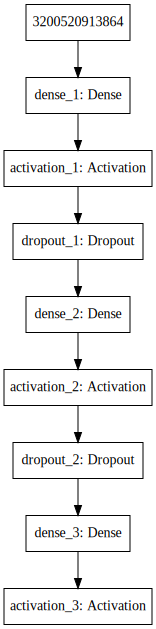

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))